# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
import requests
from datetime import datetime as dt

In [2]:
path = ChromeDriverManager().install()

In [3]:
browser = Browser('chrome', executable_path = path)

In [4]:
## View styles for plots and apply one. 
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
## Use requests to grab html content and store in html. 
response = requests.get(url)
html = response.content

#save html as a soup object
mars_soup = soup(html, "html.parser")
mars_soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.

In [7]:
# Extract all rows of data
mars_rows = mars_soup.find_all("tr", class_="data-row")
len(mars_rows)

1867

In [8]:
mars_rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
## Build logic outside of for loop first.
## Store all found tds in a list
values_list = mars_rows[0].find_all("td")
## Create a dictionary wih each key/value pair as the label/value, while extracting the text only. 
values_dict = {
    "id": values_list[0].text,
    "terrestrial_date": values_list[1].text,
    "sol": values_list[2].text,
    "ls": values_list[3].text,
    "month": values_list[4].text,
    "min_temp": values_list[5].text,
    "pressure": values_list[6].text,

}
values_dict

{'id': '2',
 'terrestrial_date': '2012-08-16',
 'sol': '10',
 'ls': '155',
 'month': '6',
 'min_temp': '-75.0',
 'pressure': '739.0'}

In [10]:
# Create an empty list
list_of_rows = []

# Loop through the scraped data to create a list of rows
for row in mars_rows:
    values_list = row.find_all("td")
    ## Store each cell as a key/value pair, and extract text of each td. 
    values_dict = {
        "id": values_list[0].text,
        "terrestrial_date": values_list[1].text,
        "sol": values_list[2].text,
        "ls": values_list[3].text,
        "month": values_list[4].text,
        "min_temp": values_list[5].text,
        "pressure": values_list[6].text,
    }
    ## Add dictionary to list. 
    list_of_rows.append(values_dict)
    
list_of_rows

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(list_of_rows)

In [12]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [13]:
## Legend
key_df = pd.DataFrame([{
    "id": "the identification number of a single transmission from the Curiosity rover",
    "terrestrial_date": "the date on Earth",
    "sol": "the number of elapsed sols (Martian days) since Curiosity landed on Mars",
    "ls": "the solar longitude",
    "month": "the Martian month",
    "min_temp": "the minimum temperature, in Celsius, of a single Martian day (sol)",
    "pressure": "The atmospheric pressure at Curiosity's location"
}])
key_df_t = key_df.transpose() ##switch column and row
pd.set_option('display.max_colwidth', None) #show entire text
key_df_t.style.set_properties(**{'text-align': 'left'}) #left-align

,0
id,the identification number of a single transmission from the Curiosity rover
terrestrial_date,the date on Earth
sol,the number of elapsed sols (Martian days) since Curiosity landed on Mars
ls,the solar longitude
month,the Martian month
min_temp,"the minimum temperature, in Celsius, of a single Martian day (sol)"
pressure,The atmospheric pressure at Curiosity's location


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
df_analysis = df.astype({
    "id" : "int",
    "sol" : "int",
    "ls" : "int",
    "month" : "int",
    "min_temp":"float", 
    "pressure":"float"})
## convert terrestial_date to datetime. 
df_analysis["terrestrial_date"] =pd.to_datetime(df_analysis["terrestrial_date"])

In [16]:
# Confirm type changes were successful by examining data types again
df_analysis.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [17]:
df_analysis.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
martian_months = df_analysis["month"].max()
print(f"There are {martian_months} Martian months.")

There are 12 Martian months.


In [19]:
# 2. How many Martian days' worth of data are there?
curiosity_days_in_mars = df_analysis["sol"].max()

print(f"There are {curiosity_days_in_mars} days worth of data, the number of days that the Curiosity rover has been on Mars.")

There are 1977 days worth of data, the number of days that the Curiosity rover has been on Mars.


In [20]:
# 3. What is the average low temperature by month?
monthly_min_t = df_analysis.groupby(by="month")["min_temp"].mean()

<AxesSubplot: title={'center': 'Average Daily Minimum Temperature Per Martian Month'}, xlabel='Martian Month', ylabel=' Average Daily Minimum Temperature (C)'>

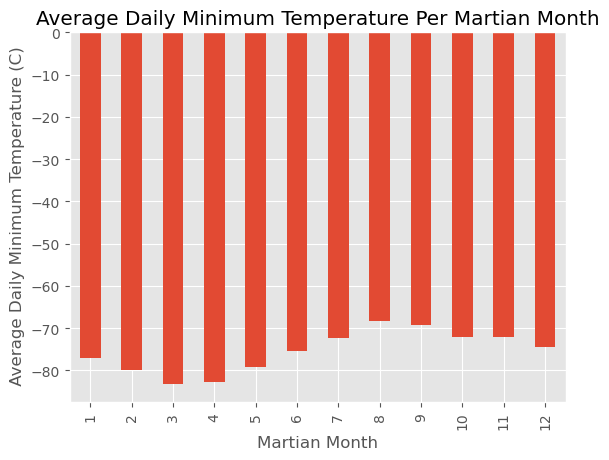

In [21]:
# Plot the average temperature by month
monthly_min_t.plot(kind="bar",
                   xlabel="Martian Month", 
                   ylabel=" Average Daily Minimum Temperature (C)", 
                   title="Average Daily Minimum Temperature Per Martian Month")


In [22]:
# Identify the coldest and hottest months in Curiosity's location
hottest_month = monthly_min_t.idxmax() ##idxmax gets the index of the max number. 
hottest_temp = round(monthly_min_t.max(),2)
coldest_month = monthly_min_t.idxmin() 
coldest_temp = round(monthly_min_t.min(),2)

print(f"""Hottest Month: Martian Month {hottest_month} at {hottest_temp} C.
Coldest Month: Martian Month {coldest_month} at {coldest_temp} C. """
     )

Hottest Month: Martian Month 8 at -68.38 C.
Coldest Month: Martian Month 3 at -83.31 C. 


In [23]:
# 4. Average pressure by Martian month
monthly_p = round(df_analysis.groupby(by="month")["pressure"].mean(),2)
monthly_p

month
1     862.49
2     889.46
3     877.32
4     806.33
5     748.56
6     745.05
7     795.11
8     873.83
9     913.31
10    887.31
11    857.01
12    842.16
Name: pressure, dtype: float64

<AxesSubplot: title={'center': 'Average Daily Atmospheric Pressure Per Martian Month'}, xlabel='Martian Month', ylabel=' Average Daily Pressure (Pa)'>

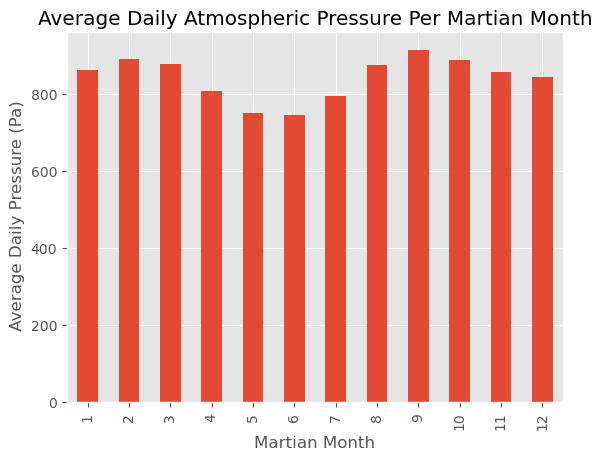

In [24]:
# Plot the average pressure by month
monthly_p.plot(kind="bar",
               xlabel="Martian Month", 
               ylabel=" Average Daily Pressure (Pa)", 
               title="Average Daily Atmospheric Pressure Per Martian Month")

In [52]:
# 5. How many terrestrial (earth) days are there in a Martian year?
print("""
The solar longitude (ls) tells you the angular position of an sun-orbiting body relative to the sun.
As Mars orbits the sun, its solar longitude will be anywhere from 0 to 359 degrees. 
Each degree within this range will repeat every Martian year.
Therefore, solar longitude can tell you, in effect, the length of a the Martian year.
If we extract all the rows where ls = 0, and get the number of days between terrestial 
timestamps, this should tell us the length of a Martian year in number of Earth days. 
""")

zeroes_only = df_analysis[df_analysis['ls']==0]
zeroes_only


The solar longitude (ls) tells you the angular position of an sun-orbiting body relative to the sun.
As Mars orbits the sun, its solar longitude will be anywhere from 0 to 359 degrees. 
Each degree within this range will repeat every Martian year.
Therefore, solar longitude can tell you, in effect, the length of a the Martian year.
If we extract all the rows where ls = 0, and get the number of days between terrestial 
timestamps, this should tell us the length of a Martian year in number of Earth days. 



,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [26]:
## Sort df in order of earth timestamp. 
zeroes_only = zeroes_only.sort_values('terrestrial_date')

## Use diff() to get the number of earth days that have passed between each timestamp. 
diff = zeroes_only["terrestrial_date"].diff()
diff

304         NaT
305      1 days
925    686 days
926      1 days
1579   686 days
1580     1 days
Name: terrestrial_date, dtype: timedelta64[ns]

In [53]:
## Get max value to get the number of Martian years. 
earth_days_martian_year = diff.max()
print(f"""There are {earth_days_martian_year.days} Earth days in a Martian year. """)

There are 686 Earth days in a Martian year. 


Text(0.5, 1.0, 'Daily Minimum Temperature on Mars')

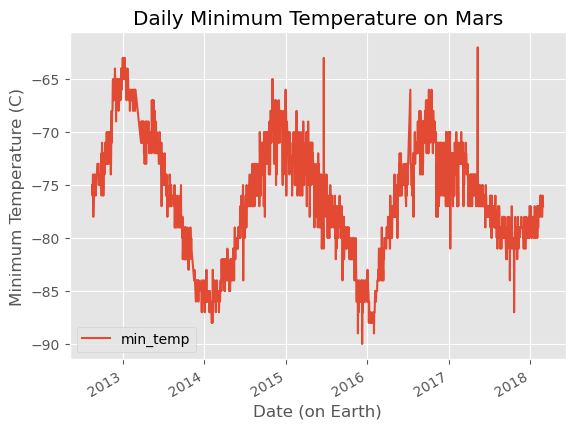

In [28]:
## Visually estimate the result by plotting the daily minimum temperature. 
df_analysis[["terrestrial_date","min_temp"]].plot(x="terrestrial_date", y="min_temp")
plt.xlabel("Date (on Earth)")
plt.ylabel("Minimum Temperature (C)")
plt.title("Daily Minimum Temperature on Mars") 

In [29]:
print("""This graph supports the calculation of 686 earth days in a Martian year. 
The peaks on the graph represent when Mars is closest to the sun. 
The distance between each peak looks a little under two Earth years in the graph. 
This is consistent with the data, as 686 Earth days is 1.88 Earth years, rounded.""")

This graph supports the calculation of 686 earth days in a Martian year. 
The peaks on the graph represent when Mars is closest to the sun. 
The distance between each peak looks a little under two Earth years in the graph. 
This is consistent with the data, as 686 Earth days is 1.88 Earth years, rounded.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [30]:
# Write the data to a CSV
with open("mars_weather.csv", "w") as g:
    df_analysis.to_csv(g, index=False)

In [31]:
browser.quit()